#Tugas 5 Praktikum Machine Learning PCA
Nama : Fadhail Athaillah Bima<br>
NIM : 24060121140172<br>
Lab : A1 <br>


## Import Library dan Dataset

In [1]:
# Import library yang dibutuhkan
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
df = pd.read_csv(url, names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'])

## Features and Target Selection

In [2]:
# Memilih fitur dan target yang akan ditentukan
features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
x = df.loc[:, features].values
y = df.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)

KeyError: "None of [Index(['target'], dtype='object')] are in the [columns]"

## PCA Model

In [ ]:
# Mengurangi dimensi data pada variabel x menjadi dua komponen utama
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

In [ ]:
# Menggabungkan dua DataFrame
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

## Plotting

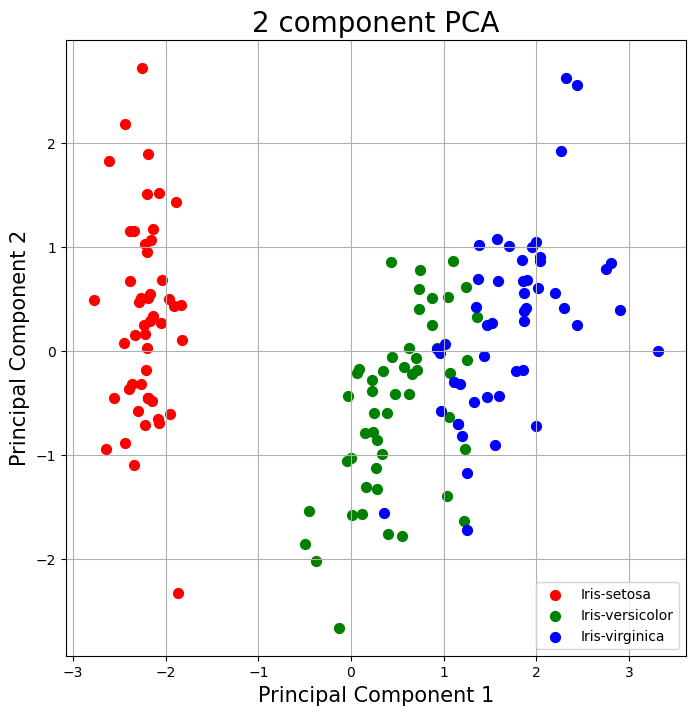

In [ ]:
# Membuat scatter plot dengan dua komponen utama hasil reduksi PCA dari dataset
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
  indicesToKeep = finalDf['target'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
             finalDf.loc[indicesToKeep, 'principal component 2'],
             c=color,
             s=50)

ax.legend(targets)
ax.grid()

Gambar tersebut menunjukkan bahwa data bunga iris tersebar di sepanjang PC1, dengan iris setosa berada di sebelah kiri, iris versicolor berada di tengah, dan iris virginica berada di sebelah kanan. Hal ini menunjukkan bahwa PC1 dapat digunakan untuk memisahkan tiga spesies iris yang berbeda.

Gambar tersebut juga menunjukkan bahwa data bunga iris tersebar secara vertikal di sepanjang PC2, dengan iris versicolor berada di bagian bawah dan iris virginica berada di bagian atas. Hal ini menunjukkan bahwa PC2 dapat digunakan untuk memisahkan iris versicolor dan iris virginica.

Secara keseluruhan, gambar tersebut menunjukkan bahwa PCA adalah metode yang efektif untuk mengurangi dimensi data bunga iris tanpa kehilangan terlalu banyak informasi.

In [ ]:
# Mendapatkan rasio varians
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

## Menggunakan dataset Hayesh-Roth

## Import Dataset

In [ ]:
# Memuat dataset dari url yang sudah ditentukan
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/hayes-roth/hayes-roth.data"

names = ['name', 'hobby', 'educational-level', 'marital-status', 'class']

dataset = pd.read_csv(url, names=names)

## Data Preprocessing

In [ ]:
# Mengecek apakah terdapat data yang kosong
dataset.isnull().sum()

name                 0
hobby                0
educational-level    0
marital-status       0
class                0
dtype: int64

In [ ]:
# Mengecek tipe data setiap fitur
dataset.dtypes

name                 int64
hobby                int64
educational-level    int64
marital-status       int64
class                int64
dtype: object

In [ ]:
# Menampilkan info data lebih lengkapnya
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 92 to 9
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   name               132 non-null    int64
 1   hobby              132 non-null    int64
 2   educational-level  132 non-null    int64
 3   marital-status     132 non-null    int64
 4   class              132 non-null    int64
dtypes: int64(5)
memory usage: 6.2 KB


## Features and Target Selection

In [ ]:
# Memilih fitur dan target yang akan ditentukan
features = ['name', 'hobby', 'educational-level', 'marital-status']
x = dataset.loc[:, features].values
y = dataset.loc[:, ['class']].values
x = StandardScaler().fit_transform(x)

## PCA Model

In [ ]:
# Mengurangi dimensi data pada variabel x menjadi dua komponen utama
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

In [ ]:
# Menggabungkan dua DataFrame
finalDf = pd.concat([principalDf, dataset[['class']]], axis = 1)

## Plotting

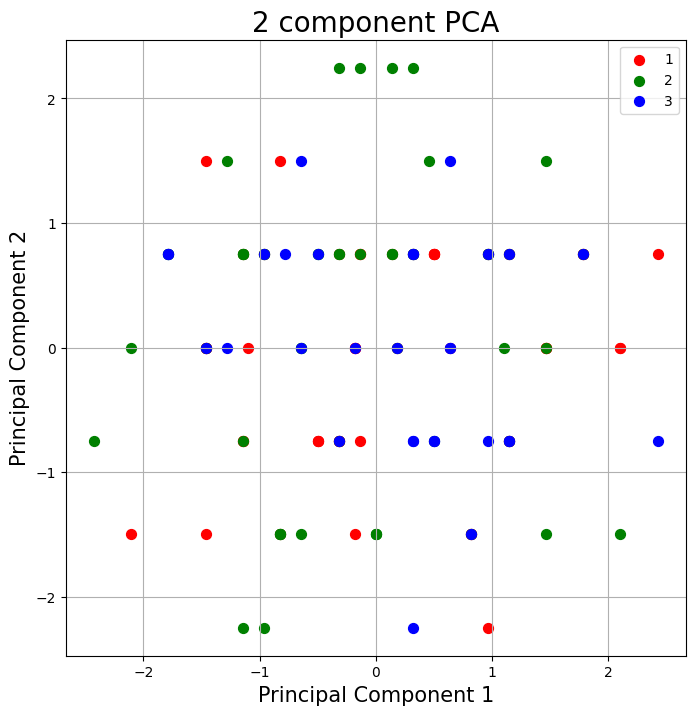

In [ ]:
# Membuat scatter plot dengan dua komponen utama hasil reduksi PCA dari dataset
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
  indicesToKeep = finalDf['class'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
             finalDf.loc[indicesToKeep, 'principal component 2'],
             c=color,
             s=50)

ax.legend(targets)
ax.grid()


Gambar tersebut menunjukkan bahwa data Hayesh-Roth tersebar di sepanjang PC1, dengan dokumen yang relevan berada di sebelah kiri dan dokumen yang tidak relevan berada di sebelah kanan. Hal ini menunjukkan bahwa PC1 dapat digunakan untuk memisahkan dokumen yang relevan dan dokumen yang tidak relevan.

Gambar tersebut juga menunjukkan bahwa data Hayesh-Roth tersebar secara vertikal di sepanjang PC2, dengan dokumen yang lebih relevan berada di bagian atas dan dokumen yang kurang relevan berada di bagian bawah. Hal ini menunjukkan bahwa PC2 dapat digunakan untuk membedakan dokumen yang lebih relevan dan dokumen yang kurang relevan.

Secara keseluruhan, gambar tersebut menunjukkan bahwa PCA adalah metode yang efektif untuk mengurangi dimensi data Hayesh-Roth tanpa kehilangan terlalu banyak informasi.

In [ ]:
# Mendapatkan rasio varians
pca.explained_variance_ratio_

array([0.27659936, 0.25482625])